In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os


In [60]:
# matplotlib.rcParams.update({'font.size': 25})

In [82]:

file_name = r"../playground/log_nes12.log"

losses = {
    "mean" : [],
    "mmd" : [],
    "avg" : [],
    "min" : [],
    "max" : [],
}

with open(file_name, "r") as f:
    for line in f:
        words = line.split(" ")
        if words[0] == "Mean":
            losses["mean"].append(float(words[-1]))
        if words[0] == "MMD":
            losses["mmd"].append(float(words[-1]))
        if words[0] == "Avg":
            losses["avg"].append(float(words[-1]))
        if words[0] == "Min":
            losses["min"].append(float(words[-1]))
        if words[0] == "Max":
            losses["max"].append(float(words[-1]))

df = pd.DataFrame(data=losses)
df.to_csv(f"../data/losses.csv", index=False)

In [83]:
loss_df = pd.read_csv(r"../data/losses.csv")
loss_df["diff"] = loss_df["max"] - loss_df["min"]

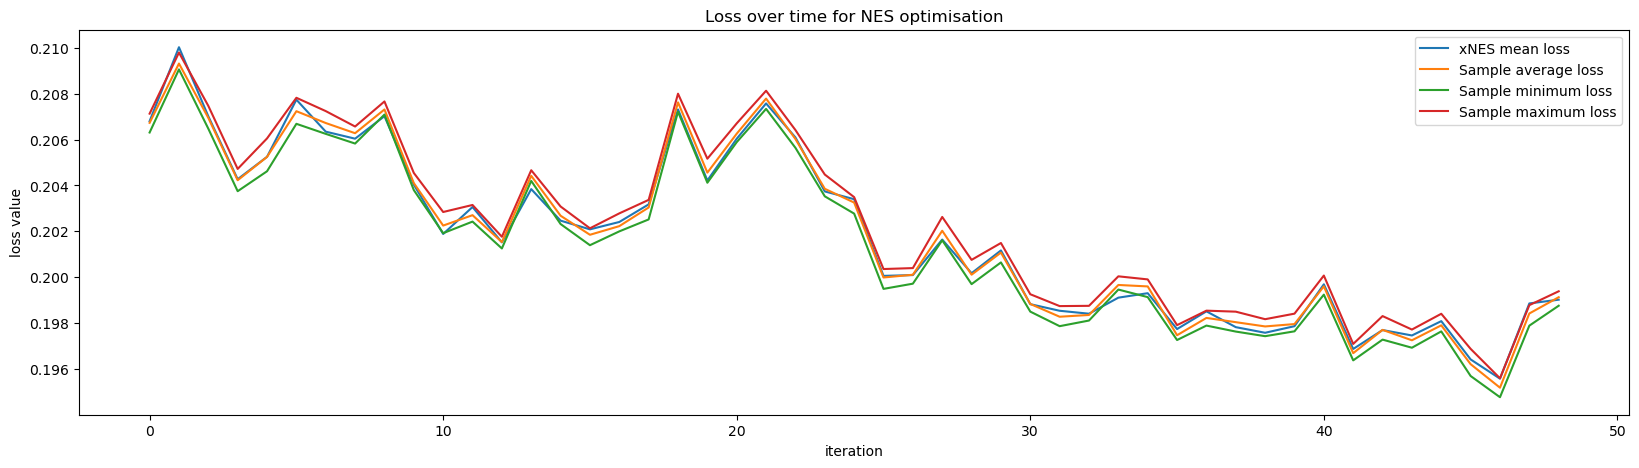

In [84]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg"], label="Sample average loss")
plt.plot(loss_df["min"], label="Sample minimum loss")
plt.plot(loss_df["max"], label="Sample maximum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

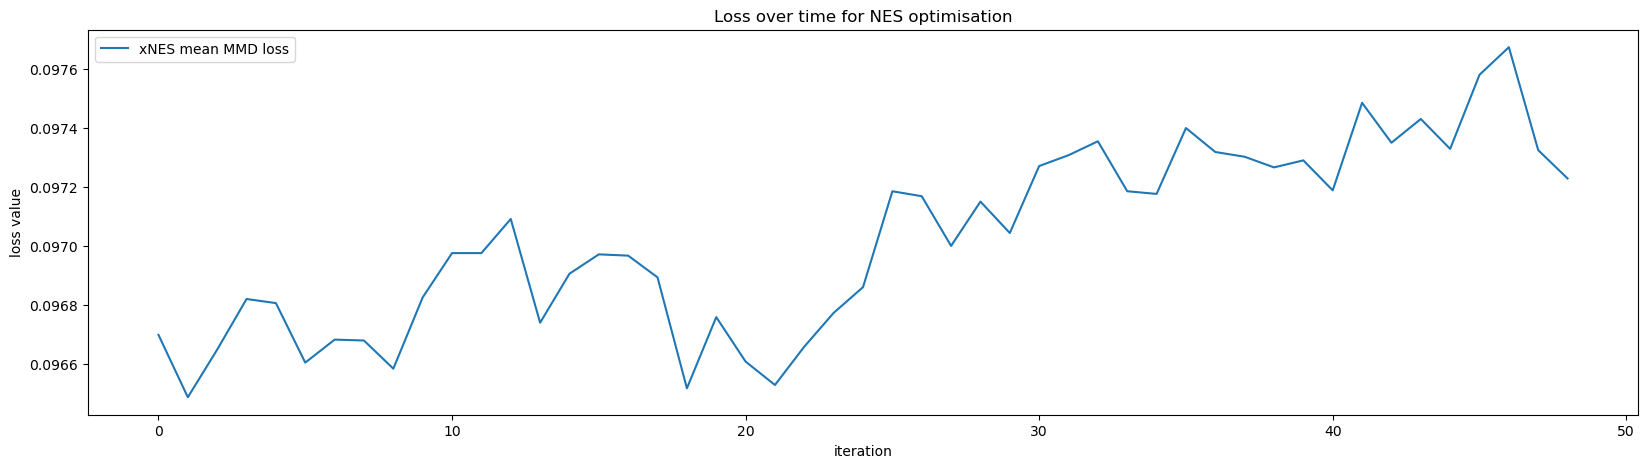

In [85]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

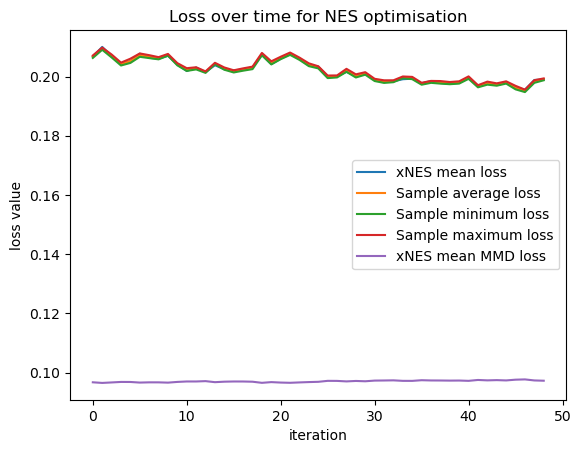

In [86]:
plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg"], label="Sample average loss")
plt.plot(loss_df["min"], label="Sample minimum loss")
plt.plot(loss_df["max"], label="Sample maximum loss")
plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

In [87]:
def plot_standing_average(array, show=True):
    standing_average = []
    current = 0
    for i, loss in enumerate(array):
        current += loss
        standing_average.append(current / (i + 1))
    plt.plot(standing_average)
    if show:
        plt.show()

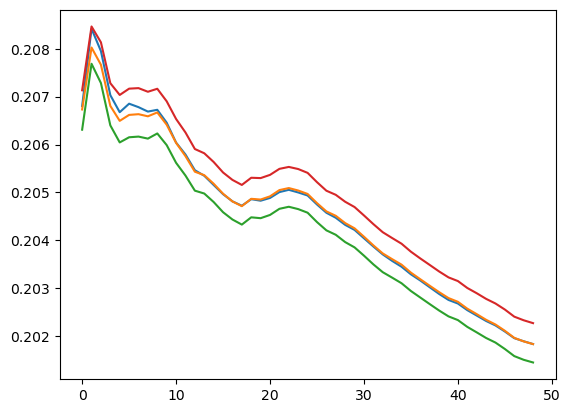

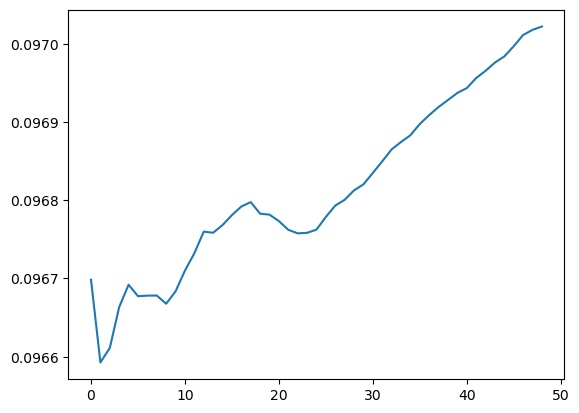

In [88]:
plot_standing_average(loss_df["mean"].to_numpy().squeeze(), show=False)
plot_standing_average(loss_df["avg"].to_numpy().squeeze(), show=False)
plot_standing_average(loss_df["min"].to_numpy().squeeze(), show=False)
plot_standing_average(loss_df["max"].to_numpy().squeeze(), show=False)
plt.show()

plot_standing_average(loss_df["mmd"].to_numpy().squeeze())

In [89]:
def print_loss_analysis(array: np.ndarray):
    print("mean:", array.mean())
    print("std:", array.std())
    print("max:", array.max())
    print("min:", array.min())
    print("range:", array.max() - array.min())

    plt.hist(array)
    plt.show()

mean: 0.2018350803491407
std: 0.0036626232191645175
max: 0.2100284664175882
min: 0.195577529024466
range: 0.014450937393122198


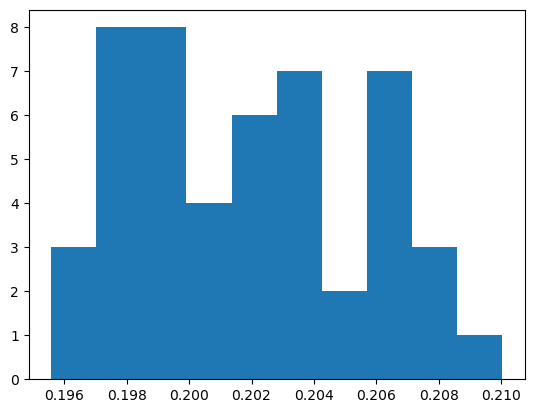

mean: 0.20183447596140972
std: 0.0037028921187509584
max: 0.2093169383376935
min: 0.1951837046345631
range: 0.014133233703130382


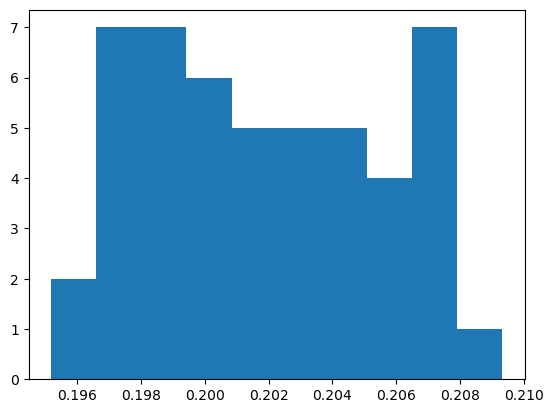

mean: 0.20145073289125848
std: 0.003690384392619356
max: 0.2090613491971144
min: 0.1947681642275393
range: 0.014293184969575101


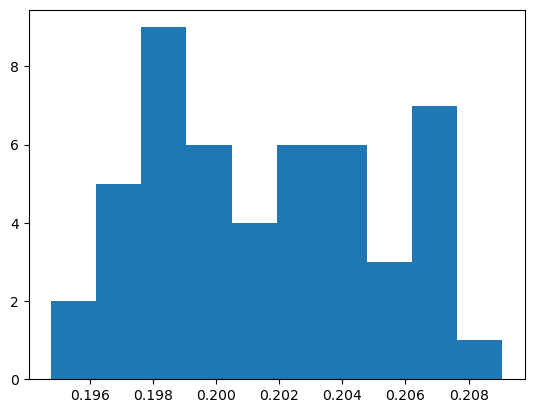

mean: 0.20227172747390343
std: 0.0037107504675079894
max: 0.2097958054298633
min: 0.1955939119586813
range: 0.014201893471182003


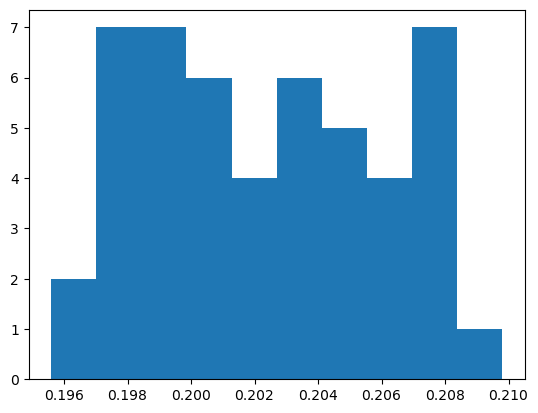

mean: 0.09702212356022781
std: 0.00030775627805303894
max: 0.0976746275538048
min: 0.096486813658672
range: 0.0011878138951327971


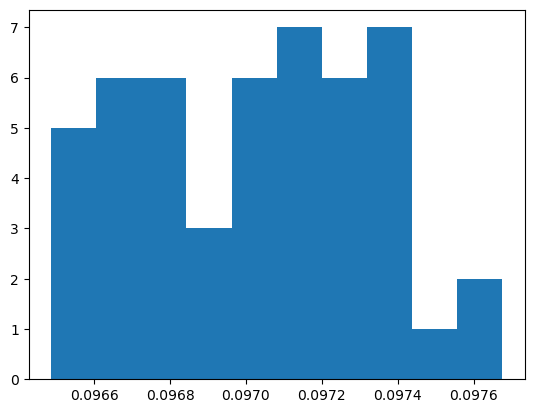

In [90]:
print_loss_analysis(loss_df["mean"].to_numpy().squeeze())
print_loss_analysis(loss_df["avg"].to_numpy().squeeze())
print_loss_analysis(loss_df["min"].to_numpy().squeeze())
print_loss_analysis(loss_df["max"].to_numpy().squeeze())
print_loss_analysis(loss_df["mmd"].to_numpy().squeeze())

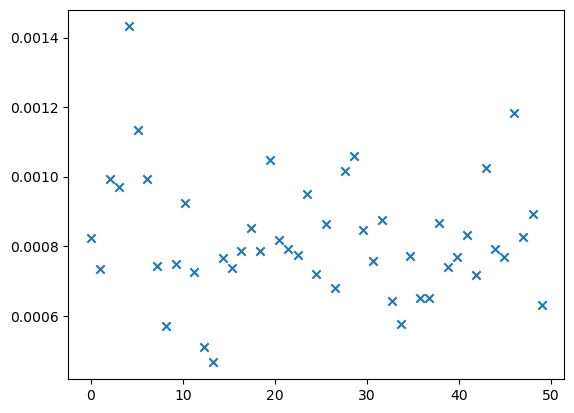

mean: 0.0008209945826449414
std: 0.00017444727189337638
max: 0.001431825531957115
min: 0.0004654343162353025
range: 0.0009663912157218124


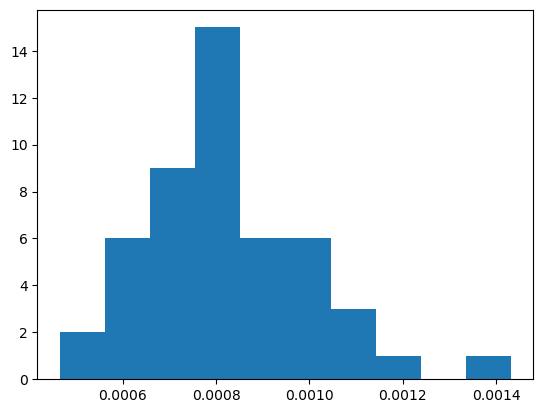

In [91]:
x_vals = np.linspace(0, len(loss_df["diff"]), len(loss_df["diff"]))
plt.scatter(x_vals, loss_df["diff"], marker="x")
plt.show()

print_loss_analysis(loss_df["diff"].to_numpy().squeeze())